# Peformance

This notebook shows the training and test performance obtain across different experiments

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
exp_name = "gru_003"

pathfile = os.path.join(exp_name,"metrics","version_0","metrics.csv")
df = pd.read_csv(pathfile)

In [31]:
# Create a copy of the DataFrame
df_clean = df.copy()

# For rows with validation metrics, fill in the training loss from the other row of the same epoch
for epoch in df_clean[df_clean['val_auc'].notna()]['epoch'].unique():
    # Get the training loss for this epoch
    train_loss = df_clean[(df_clean['epoch'] == epoch) & (df_clean['train_loss'].notna())]['train_loss'].iloc[0]
    # Update the row with validation metrics
    df_clean.loc[(df_clean['epoch'] == epoch) & (df_clean['val_auc'].notna()), 'train_loss'] = train_loss

# Remove duplicate epochs, keeping the row with validation metrics
df_clean = df_clean.sort_values('val_auc', na_position='first').drop_duplicates(subset=['epoch'], keep='last')

# Sort by epoch
df_clean = df_clean.sort_values('epoch')

In [34]:
df_valid_metrics = df_clean.loc[df_clean['val_auc'].notna()]
df_valid_metrics

,epoch,step,train_loss,val_auc,val_f1,val_loss,val_map
9,9,1569,0.053207,0.331069,0.006554,0.052290,0.072361
20,19,3139,0.051985,0.336325,0.005788,0.051203,0.075572
31,29,4709,0.051508,0.342490,0.008307,0.050204,0.079153
42,39,6279,0.050991,0.344571,0.008420,0.050253,0.083434
53,49,7849,0.050139,0.353795,0.009700,0.049070,0.093778
64,59,9419,0.049735,0.354917,0.010278,0.049163,0.095398
75,69,10989,0.049466,0.355988,0.013584,0.049102,0.097673
86,79,12559,0.049409,0.358460,0.012979,0.048438,0.101404
97,89,14129,0.049230,0.356676,0.013541,0.048860,0.098663
108,99,15699,0.049124,0.358391,0.012180,0.049162,0.101742


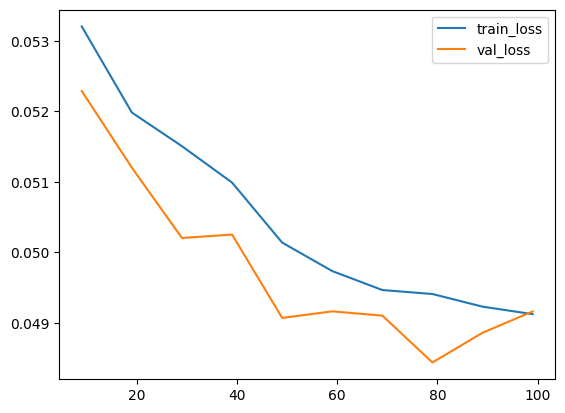

In [35]:
plt.figure()
plt.plot(df_valid_metrics["epoch"], df_valid_metrics["train_loss"], label="train_loss")
plt.plot(df_valid_metrics["epoch"], df_valid_metrics["val_loss"], label="val_loss")
plt.legend()